In [1]:
# Carga de librerias
import pandas as pd
import numpy as np 

In [2]:
# Cargamos los datos para leerlos
data = pd.read_csv("data_latinoamerica.csv",sep=',')

In [3]:
# Mostramos las primeras filas 
data.head()

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2021-01-02,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
1,AR,2021-01-03,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
2,AR,2021-01-04,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
3,AR,2021-01-05,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
4,AR,2021-01-06,AR,Argentina,14496.0,131.0,1718102.0,47293.0,34162.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN


In [4]:
# Cantidad de filas y columnas en el dataframe
np.shape(data)
data.shape

(3744, 50)

In [5]:
#   Seleccionamos los paises y filtramos el dataframe 
paises_seleccionados = ['Argentina','Chile','Colombia','Mexico','Peru','Brazil']
data_latinoamerica = data[data['country_name'].isin(paises_seleccionados)]

In [6]:
np.shape(data_latinoamerica)

(3744, 50)

In [7]:
# Vemos si hay valores nulos 
data_latinoamerica.isnull().sum()

location_key                                0
date                                        0
country_code                                0
country_name                                0
new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
population                                  0
population_male                             0
population_female                           0
population_rural                            0
population_urban                            0
population_density                          0
human_development_index                     0
population_age_00_09                        0
population_age_10_19                        0
population_age_20_29                        0
population_age_30_39                        0
population_age_40_49                        0
population_age_50_59              

In [8]:
data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum()>4000000]

Series([], dtype: int64)

In [9]:
#Despues de haber hecho un análisis de la calidad de los datos, podemos ver que tenemos datos faltantes en muchas columnas,
#  por lo que despues realizaremos un nuevo filtro por la columna "Location_key"  pero solo vamos a ustilizar las instancias 
# que correspondan a los países que hemos seleccionado y no a sus regiones o subregiones AR, CL, CO, MX, PE, BR.
data_latinoamerica_paises = data_latinoamerica[data_latinoamerica['location_key'].isin(['AR','CL','CO','MX','PE','BR'])]

In [10]:
np.shape(data_latinoamerica_paises)

(3744, 50)

In [11]:
#vamos a tomar los datos a partir de la fecha 2021-01-01, ya que es la fecha 
# en la que se empezaron a registrar mejor los datos.
data_latinoamerica_paises_Fecha = data_latinoamerica_paises[data_latinoamerica_paises['date']>'2021-01-01']

In [12]:
data_latinoamerica_paises_Fecha.shape

(3744, 50)

In [13]:
#Con el nuevo filtro vamos a ver que cantidad de elementos tenemos vacios
valores_nulos_fecha = data_latinoamerica_paises_Fecha.isnull().sum()[data_latinoamerica_paises_Fecha.isnull().sum()>0]
valores_nulos_fecha

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64

In [14]:
# Usamos un for para completar los valores nulos de las columnas de la media de cada país.
for pais in paises_seleccionados:
    data_latinoamerica_paises_Fecha['new_confirmed'] = data_latinoamerica_paises_Fecha['new_confirmed'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['new_confirmed'].mean())
    data_latinoamerica_paises_Fecha['new_deceased'] = data_latinoamerica_paises_Fecha['new_deceased'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['new_deceased'].mean())
    data_latinoamerica_paises_Fecha['cumulative_confirmed'] = data_latinoamerica_paises_Fecha['cumulative_confirmed'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['cumulative_confirmed'].mean())
    data_latinoamerica_paises_Fecha['cumulative_deceased'] = data_latinoamerica_paises_Fecha['cumulative_deceased'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['cumulative_deceased'].mean())
    data_latinoamerica_paises_Fecha['rainfall_mm'] = data_latinoamerica_paises_Fecha['rainfall_mm'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['rainfall_mm'].mean())
    data_latinoamerica_paises_Fecha['relative_humidity'] = data_latinoamerica_paises_Fecha['relative_humidity'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['relative_humidity'].mean())
    data_latinoamerica_paises_Fecha['average_temperature_celsius'] = data_latinoamerica_paises_Fecha['average_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['average_temperature_celsius'].mean())
    data_latinoamerica_paises_Fecha['minimum_temperature_celsius'] = data_latinoamerica_paises_Fecha['minimum_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['minimum_temperature_celsius'].mean())
    data_latinoamerica_paises_Fecha['maximum_temperature_celsius'] = data_latinoamerica_paises_Fecha['maximum_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['maximum_temperature_celsius'].mean())

# Llenar Nan con el valore de 0 en la columna new_recovered,cumulative_recovered,cumulative_vaccine_doses_administered para hacer analisis de estos datos.
data_latinoamerica_paises_Fecha['new_recovered'] = data_latinoamerica_paises_Fecha['new_recovered'].fillna(0)
data_latinoamerica_paises_Fecha['cumulative_recovered'] = data_latinoamerica_paises_Fecha['cumulative_recovered'].fillna(0)
data_latinoamerica_paises_Fecha['cumulative_vaccine_doses_administered'] = data_latinoamerica_paises_Fecha['cumulative_vaccine_doses_administered'].fillna(0)


In [15]:
#GUARDAMOS EL DATA FRAME FILTRADO
data_latinoamerica_paises_Fecha.to_csv("DatosFinalesFiltrado.csv",index=False)

In [16]:
data_latinoamerica_paises.describe()

,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_rural,population_urban,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
count,3723.000000,3723.000000,3.723000e+03,3723.000000,3.160000e+03,3.744000e+03,3.744000e+03,3.744000e+03,3.744000e+03,3.744000e+03,...,3.744000e+03,3.744000e+03,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,1628.000000,1.008000e+03
mean,13936.279613,277.164115,6.784382e+06,193136.784045,7.753959e+07,7.772147e+07,3.787035e+07,3.927162e+07,1.255498e+07,6.833931e+07,...,1.443888e+07,2.636580e+06,59502.500000,76.808500,154.274667,81.428000,36.566667,14.816667,19004.277641,1.446491e+07
std,24273.618006,508.449365,7.999625e+06,183022.316718,9.588963e+07,6.713776e+07,3.318494e+07,3.448407e+07,1.008074e+07,5.829529e+07,...,5.710077e+06,2.584740e+06,45125.320206,1.597394,27.000146,11.800623,13.027569,1.665972,31905.184618,1.050553e+07
min,-573.000000,0.000000,9.710000e+02,1.000000,1.800000e+01,1.757400e+07,8.972014e+06,8.601989e+06,2.341903e+06,1.661014e+07,...,6.723516e+06,7.094180e+05,12027.000000,74.992000,107.669000,59.035000,25.300000,12.400000,-31119.000000,1.471374e+06
25%,1530.500000,25.500000,2.129800e+06,59225.000000,1.566807e+07,2.938188e+07,1.445076e+07,1.493113e+07,3.599141e+06,2.539034e+07,...,1.055471e+07,1.090598e+06,16425.000000,75.672000,146.370000,77.999000,26.600000,12.600000,0.000000,4.759981e+06
50%,5176.000000,99.000000,3.633546e+06,139636.000000,4.229069e+07,4.791080e+07,2.225416e+07,2.324582e+07,8.316128e+06,4.108344e+07,...,1.291832e+07,1.543881e+06,45582.000000,76.518000,149.351000,82.149000,33.300000,15.750000,4372.000000,1.304208e+07
75%,14915.000000,313.500000,6.223497e+06,215123.500000,8.268101e+07,1.109920e+08,5.485523e+07,5.748131e+07,2.494867e+07,1.026269e+08,...,2.167191e+07,2.690269e+06,102418.000000,77.109000,184.379000,91.421000,37.000000,15.800000,26143.750000,2.161831e+07
max,298408.000000,11447.000000,3.456883e+07,685203.000000,3.478685e+08,2.125594e+08,1.044358e+08,1.081236e+08,2.780789e+07,1.832416e+08,...,2.184651e+07,8.241430e+06,134981.000000,80.042000,188.528000,95.815000,63.900000,16.600000,282957.000000,3.370623e+07


In [17]:
# crea un funcion  que solo muestre los valores numericos y no los valores categoricos, ademas solo da la media,median y la desviacion estandar.
def describir_datos(data):
    for i in data.columns:
        if data[i].dtype=='float64' or data[i].dtype=='int64':
            print(i)
            print('Mediana:',data[i].median())
            print('varianza:',data[i].var())
            print('Rango', data[i].max()-data[i].min())
            print("Moda",data[i].mode())
            print('---------------------------------')

describir_datos(data_latinoamerica_paises)

new_confirmed
Mediana: 5176.0
varianza: 589208531.1036869
Rango 298981.0
Moda 0    0.0
Name: new_confirmed, dtype: float64
---------------------------------
new_deceased
Mediana: 99.0
varianza: 258520.75677747422
Rango 11447.0
Moda 0    0.0
Name: new_deceased, dtype: float64
---------------------------------
cumulative_confirmed
Mediana: 3633546.0
varianza: 63994005722816.09
Rango 34567862.0
Moda 0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19    9341492.0
20    9367172.0
21    9394326.0
22    9426171.0
23    9465827.0
24    9507562.0
25    9560307.0
26    9602534.0
27    9633732.0
28    9658391.0
29    9678225.0
30    9689861.0
Name: cumulative_confirmed, dtype: float64
---------------------------------
cumulative_deceased
Mediana

AVANCE 2

In [18]:
# Proyecto Integrador

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importa el módulo 'warnings' para poder controlar la visualización de advertencias.
import warnings

# Configura el filtro de advertencias para ignorarlas, lo que evita que se impriman mensajes de advertencia durante la ejecución del código.
warnings.filterwarnings("ignore")

# Carga el archivo CSV 'DatosFinalesFiltrado.csv' en un DataFrame de pandas.
# El separador de columnas en el archivo es la coma (',').
data_latinoamerica_paises = pd.read_csv("DatosFinalesFiltrado.csv", sep=",")

# Muestra un resumen del DataFrame: número de entradas, columnas, tipos de datos y cantidad de valores no nulos por columna.
data_latinoamerica_paises.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

In [19]:
# Avance 2

# Acercamiento a las estadísticas básicas de los datos. 
# Usamos un ciclo for para recorrer las columnas y obtener la media, mediana, 
# desviación estándar, mínimo y máximo de cada columna.
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print()

paises_seleccionados=["Argentina","Chile","Colombia","Mexico","Peru","Brazil"]

data_latinoamerica_paises.head()


location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object

date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object

country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object

country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object

new_confirmed
count      3744.000000
mean      13930.531008
std       24205.550042
min        -573.000000
25%        1536.750000
50%        5227.000000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64

new_deceased
count     3744.000000
mean       276.363237
std        507.133193
min          0.000000
25%         26.000000
50%        101.000000
75%        311.000000
max      11447.000000
Name: new_deceased, dtype: float64

cumulative_confirmed
count    3.744000e+03
mean     6.780429e+06
std      7.9773

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2021-01-02,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,0.0,0.0
1,AR,2021-01-03,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,0.0,0.0
2,AR,2021-01-04,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,0.0,0.0
3,AR,2021-01-05,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,0.0,0.0
4,AR,2021-01-06,AR,Argentina,14496.0,131.0,1718102.0,47293.0,34162.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,0.0,0.0


In [20]:
# Agregamos una columna “Date” para hacer análisis de datos a lo largo del tiempo.
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date', inplace=True)

data_latinoamerica_paises.head()


,location_key,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
date,,,,,,,,,,,,,,,,,,,,,
2021-01-02,AR,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,19523766.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,0.0,0.0
2021-01-03,AR,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,19523766.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,0.0,0.0
2021-01-04,AR,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,19523766.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,0.0,0.0
2021-01-05,AR,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,19523766.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,0.0,0.0
2021-01-06,AR,AR,Argentina,14496.0,131.0,1718102.0,47293.0,34162.0,44938712.0,19523766.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,0.0,0.0


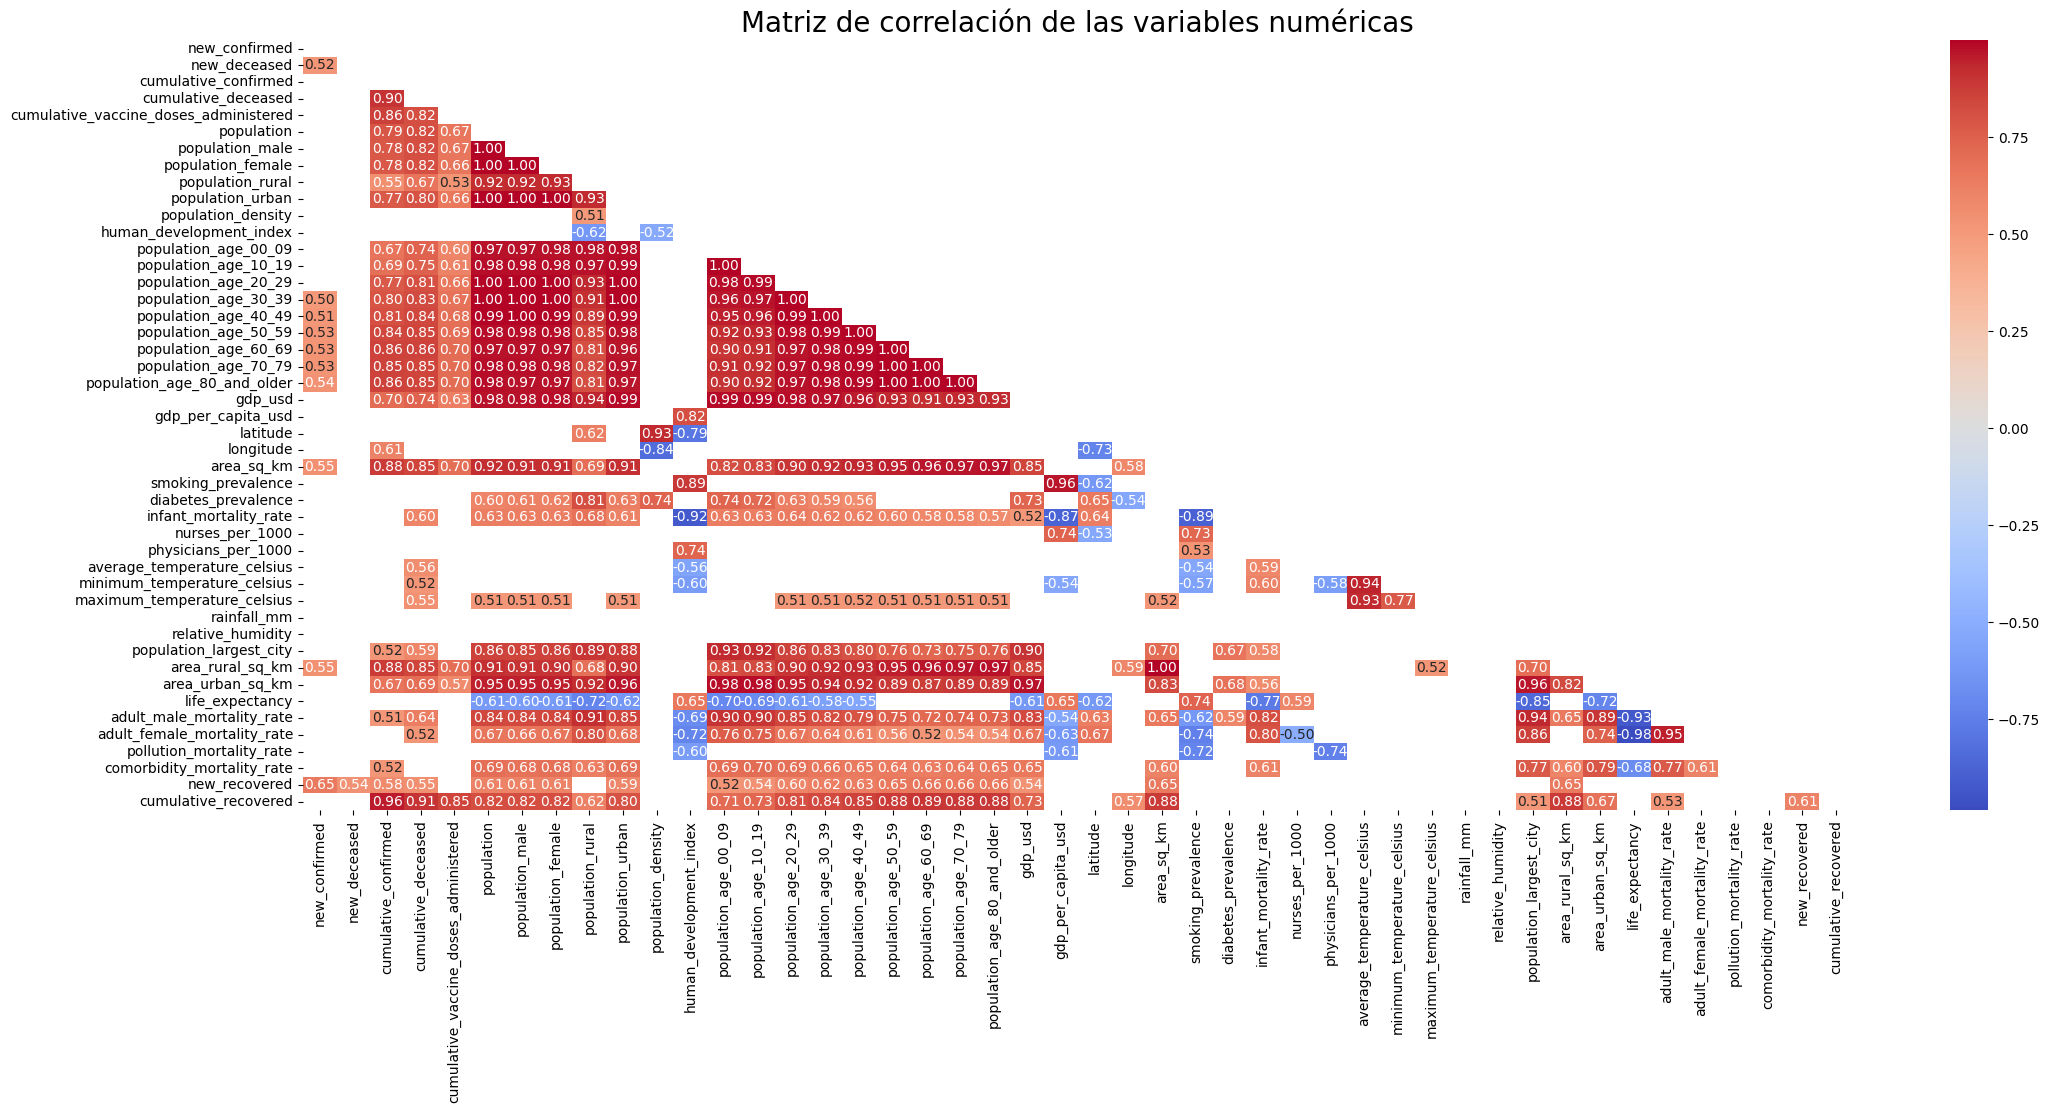

In [21]:
#Se crea la matriz de correlación de las variables numéricas
numeric_columns = data_latinoamerica_paises.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_latinoamerica_paises[numeric_columns].corr()

#Aquí se crea máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Vamos a mostrar valores superiores a 0.5 es decur donde hay una correlación fuerte sin embargo tambien se puede mostrar valores negativos.
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

# Se crea la gráfica
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

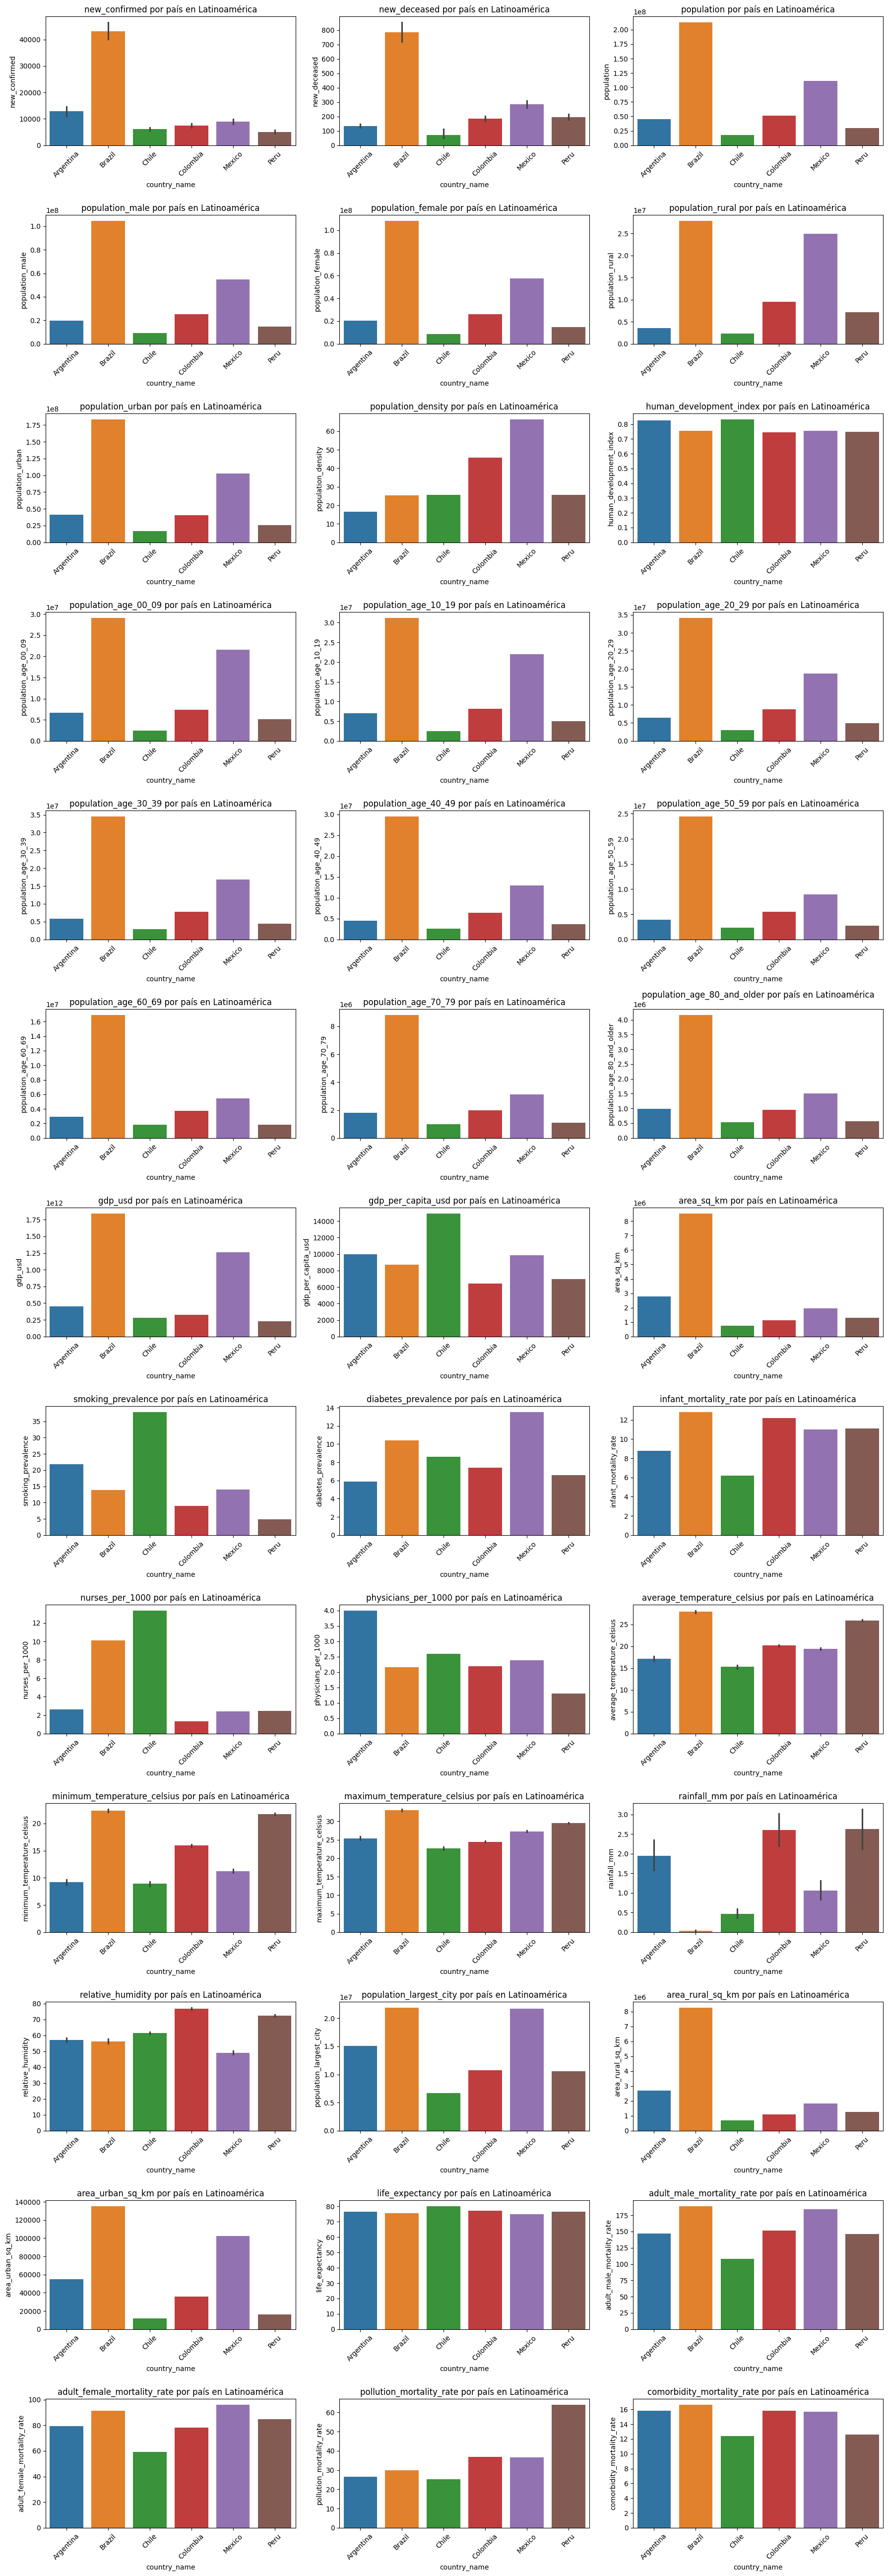

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Reiniciar el índice por si hace falta
data_latinoamerica_paises = data_latinoamerica_paises.reset_index()

# Columnas que no queremos graficar
columnas_excluidas = [
    'location_key', 'date', 'country_code', 'country_name', 'latitude', 'longitude',
    'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered',
    'cumulative_vaccine_doses_administered', 'new_recovered'
]

# Seleccionar columnas numéricas para graficar
columnas_para_graficar = [col for col in data_latinoamerica_paises.columns if col not in columnas_excluidas]

# Parámetros de grilla
columnas = 3  # columnas por fila
filas = math.ceil(len(columnas_para_graficar) / columnas)

# Crear figura
fig, axes = plt.subplots(filas, columnas, figsize=(6 * columnas, 4 * filas))
axes = axes.flatten()

# Generar los gráficos
for i, col in enumerate(columnas_para_graficar):
    sns.barplot(x='country_name', y=col, data=data_latinoamerica_paises, ax=axes[i], hue='country_name', legend=False)
    axes[i].set_title(f'{col} por país en Latinoamérica')
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [23]:
# Paleta personalizada (azules a grises)
colores = ['#08306B', '#2171B5', '#6BAED6', '#C6DBEF', '#D9D9D9', '#969696']


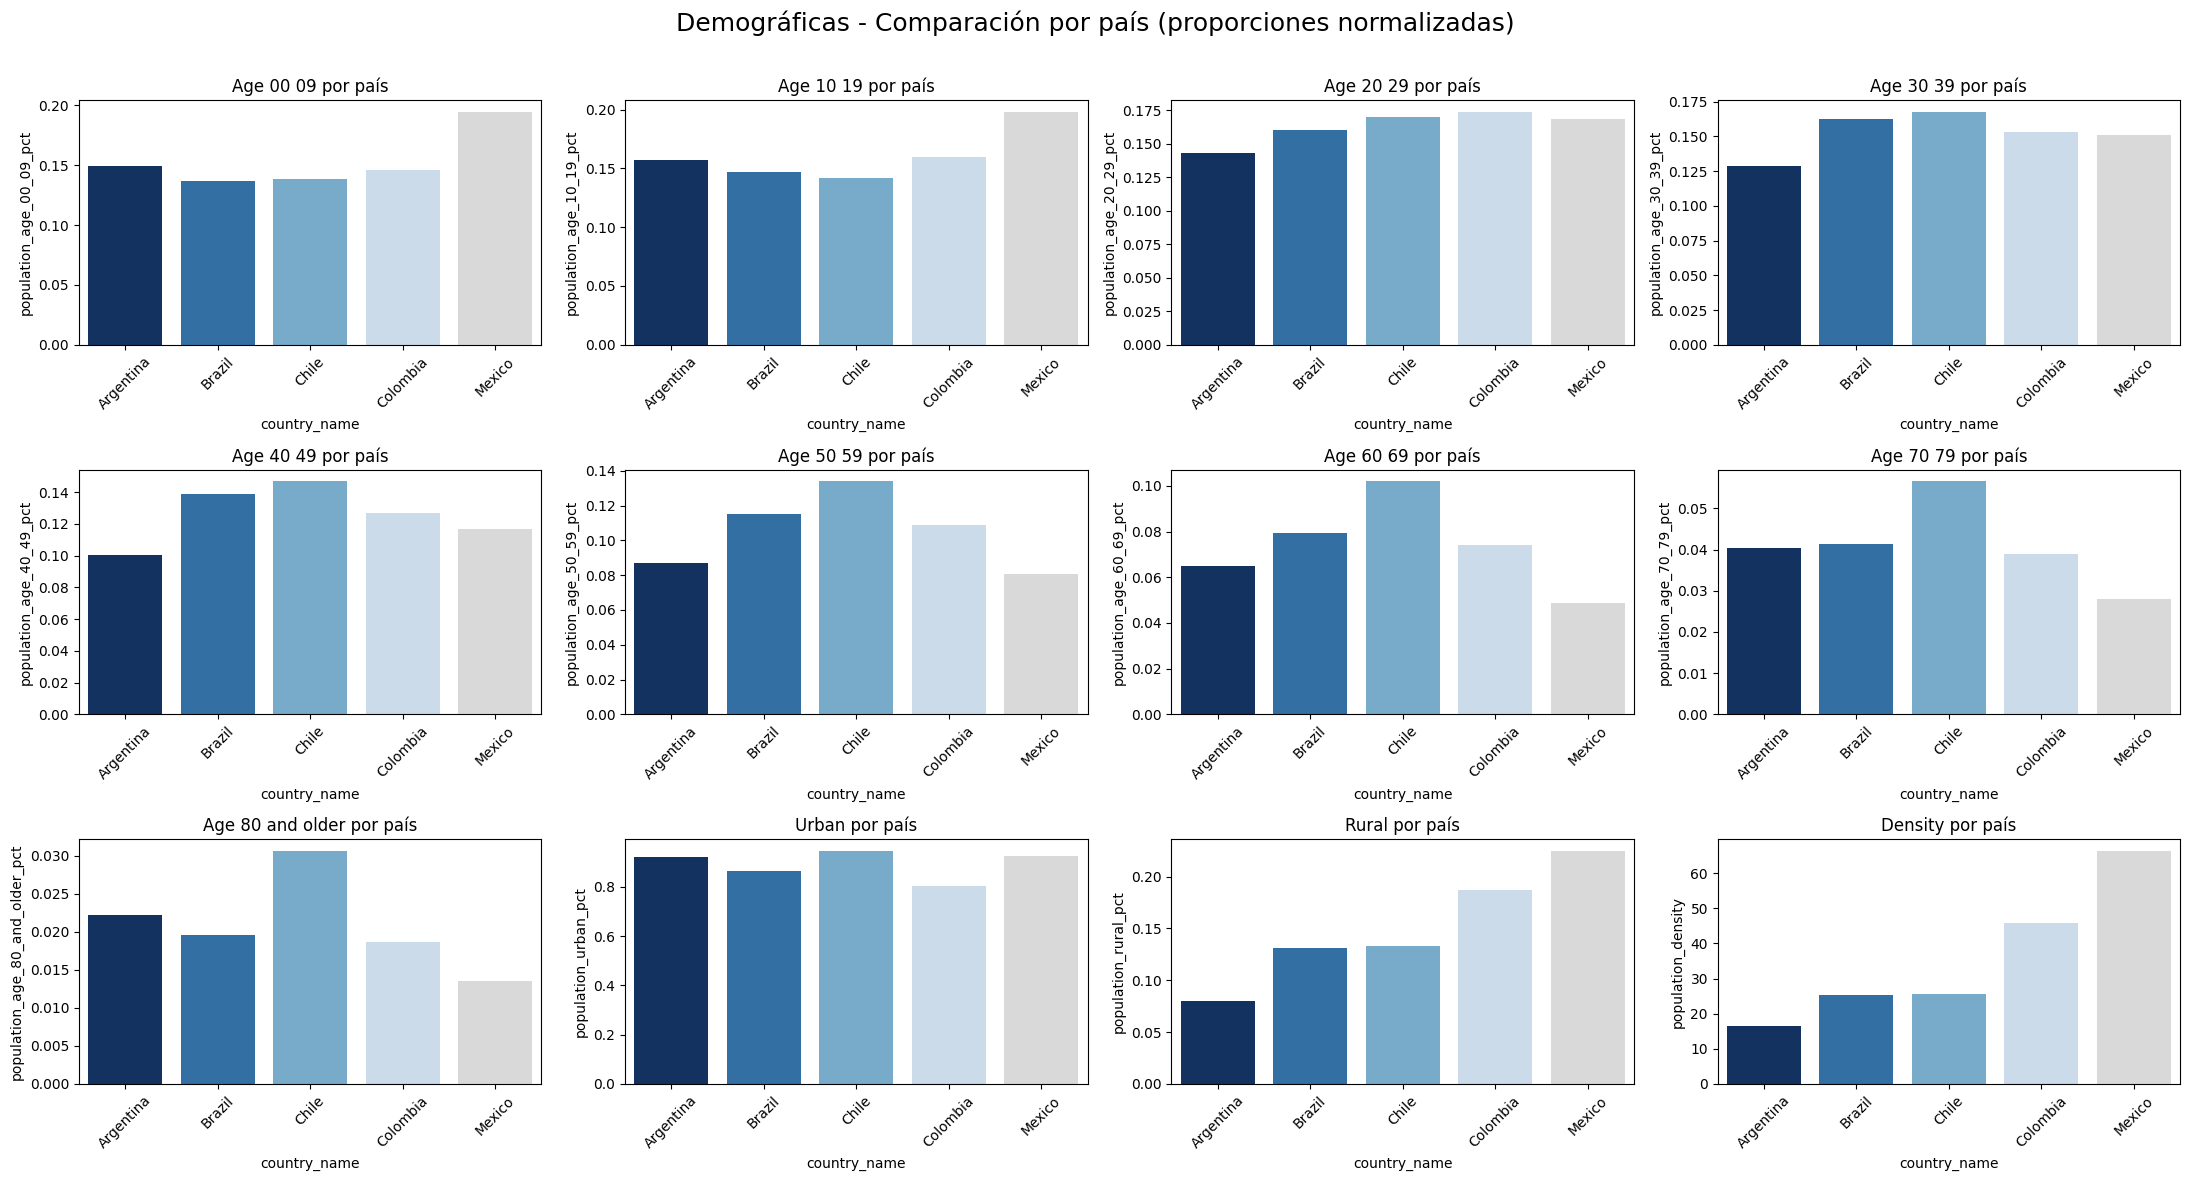

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Cargar datos y seleccionar países
# -------------------------------
df = pd.read_csv('data_latinoamerica.csv')

paises_seleccionados = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Perú']
df = df[df['country_name'].isin(paises_seleccionados)]

# -------------------------------
# 2. Eliminar columnas que no aportan (tienen un solo valor)
# -------------------------------
columnas_validas = [col for col in df.columns if df[col].nunique() > 1]
df = df[columnas_validas]

# >>> COLUMNAS EXCLUIDAS POR NO VARIAR ENTRE PAÍSES:
# 'country_code', 'region', 'income_group', etc.

# -------------------------------
# 3. Agrupar columnas por tipo
# -------------------------------
# Grupo 1: Distribución por edad
columnas_edad = [col for col in df.columns if 'age_' in col and col.startswith('population_')]

# Grupo 2: Población urbana vs rural
columnas_urban_rural = ['population_urban', 'population_rural']

# Grupo 3: Densidad poblacional
columnas_densidad = ['population_density']

# -------------------------------
# 4. Calcular proporciones respecto a la población total
# -------------------------------
columnas_proporcion = columnas_edad + columnas_urban_rural

for col in columnas_proporcion:
    df[f'{col}_pct'] = df[col] / df['population']

# -------------------------------
# 5. Lista final de columnas para graficar
# -------------------------------
columnas_finales = [f'{col}_pct' for col in columnas_proporcion] + columnas_densidad

# -------------------------------
# 6. Definir paleta de colores (de azul oscuro a gris)
# -------------------------------
colores = ['#08306B', '#2171B5', '#6BAED6', '#C6DBEF', '#D9D9D9', '#969696']

# -------------------------------
# 7. Crear gráficos
# -------------------------------
num_graficos = len(columnas_finales)
cols = 4
filas = (num_graficos + cols - 1) // cols
fig, axs = plt.subplots(filas, cols, figsize=(22, filas * 4))
axs = axs.flatten()

for i, col in enumerate(columnas_finales):
    sns.barplot(data=df, x='country_name', y=col, ax=axs[i], palette=colores)
    titulo = col.replace("population_", "").replace("_pct", "").replace("_", " ").capitalize()
    axs[i].set_title(f'{titulo} por país')
    axs[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos si sobran
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Título general
fig.suptitle('Demográficas - Comparación por país (proporciones normalizadas)', fontsize=18)
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


Columnas económicas encontradas: ['human_development_index', 'gdp_usd', 'gdp_per_capita_usd']


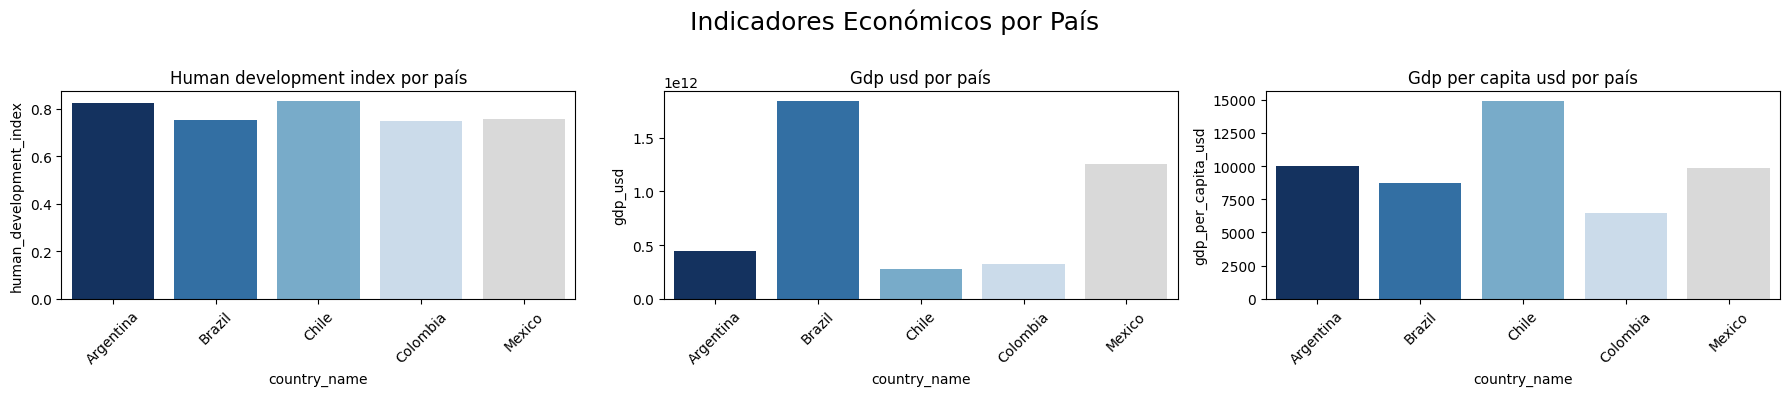

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Cargar datos y filtrar países
# -------------------------------
df = pd.read_csv('data_latinoamerica.csv')
paises = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Perú']
df = df[df['country_name'].isin(paises)]

# -------------------------------
# 2. Eliminar columnas que no varían
# -------------------------------
columnas_validas = [col for col in df.columns if df[col].nunique() > 1]
df = df[columnas_validas]

# -------------------------------
# 3. Seleccionar columnas de economía
# -------------------------------
columnas_economia_posibles = [
    'human_development_index',
        'gdp_usd', 'gdp_per_capita_usd'
]

# Verificar cuáles existen en tu DataFrame
columnas_economia = [col for col in columnas_economia_posibles if col in df.columns]

# Mostrar las columnas encontradas
print("Columnas económicas encontradas:", columnas_economia)

# Verificamos que haya columnas antes de graficar
if columnas_economia:
    # -------------------------------
    # 4. Definir paleta de colores
    # -------------------------------
    colores = ['#08306B', '#2171B5', '#6BAED6', '#C6DBEF', '#D9D9D9', '#969696']

    # -------------------------------
    # 5. Crear gráficos
    # -------------------------------
    num_graficos = len(columnas_economia)
    cols = 3
    filas = (num_graficos + cols - 1) // cols
    fig, axs = plt.subplots(filas, cols, figsize=(18, filas * 4))
    axs = axs.flatten()

    for i, col in enumerate(columnas_economia):
        sns.barplot(data=df, x='country_name', y=col, ax=axs[i], palette=colores)
        titulo = col.replace("_", " ").capitalize()
        axs[i].set_title(f'{titulo} por país')
        axs[i].tick_params(axis='x', rotation=45)

    # Borrar ejes sobrantes
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    # Título general
    fig.suptitle('Indicadores Económicos por País', fontsize=18)
    fig.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

else:
    print("⚠️ No se encontraron columnas económicas en el DataFrame.")


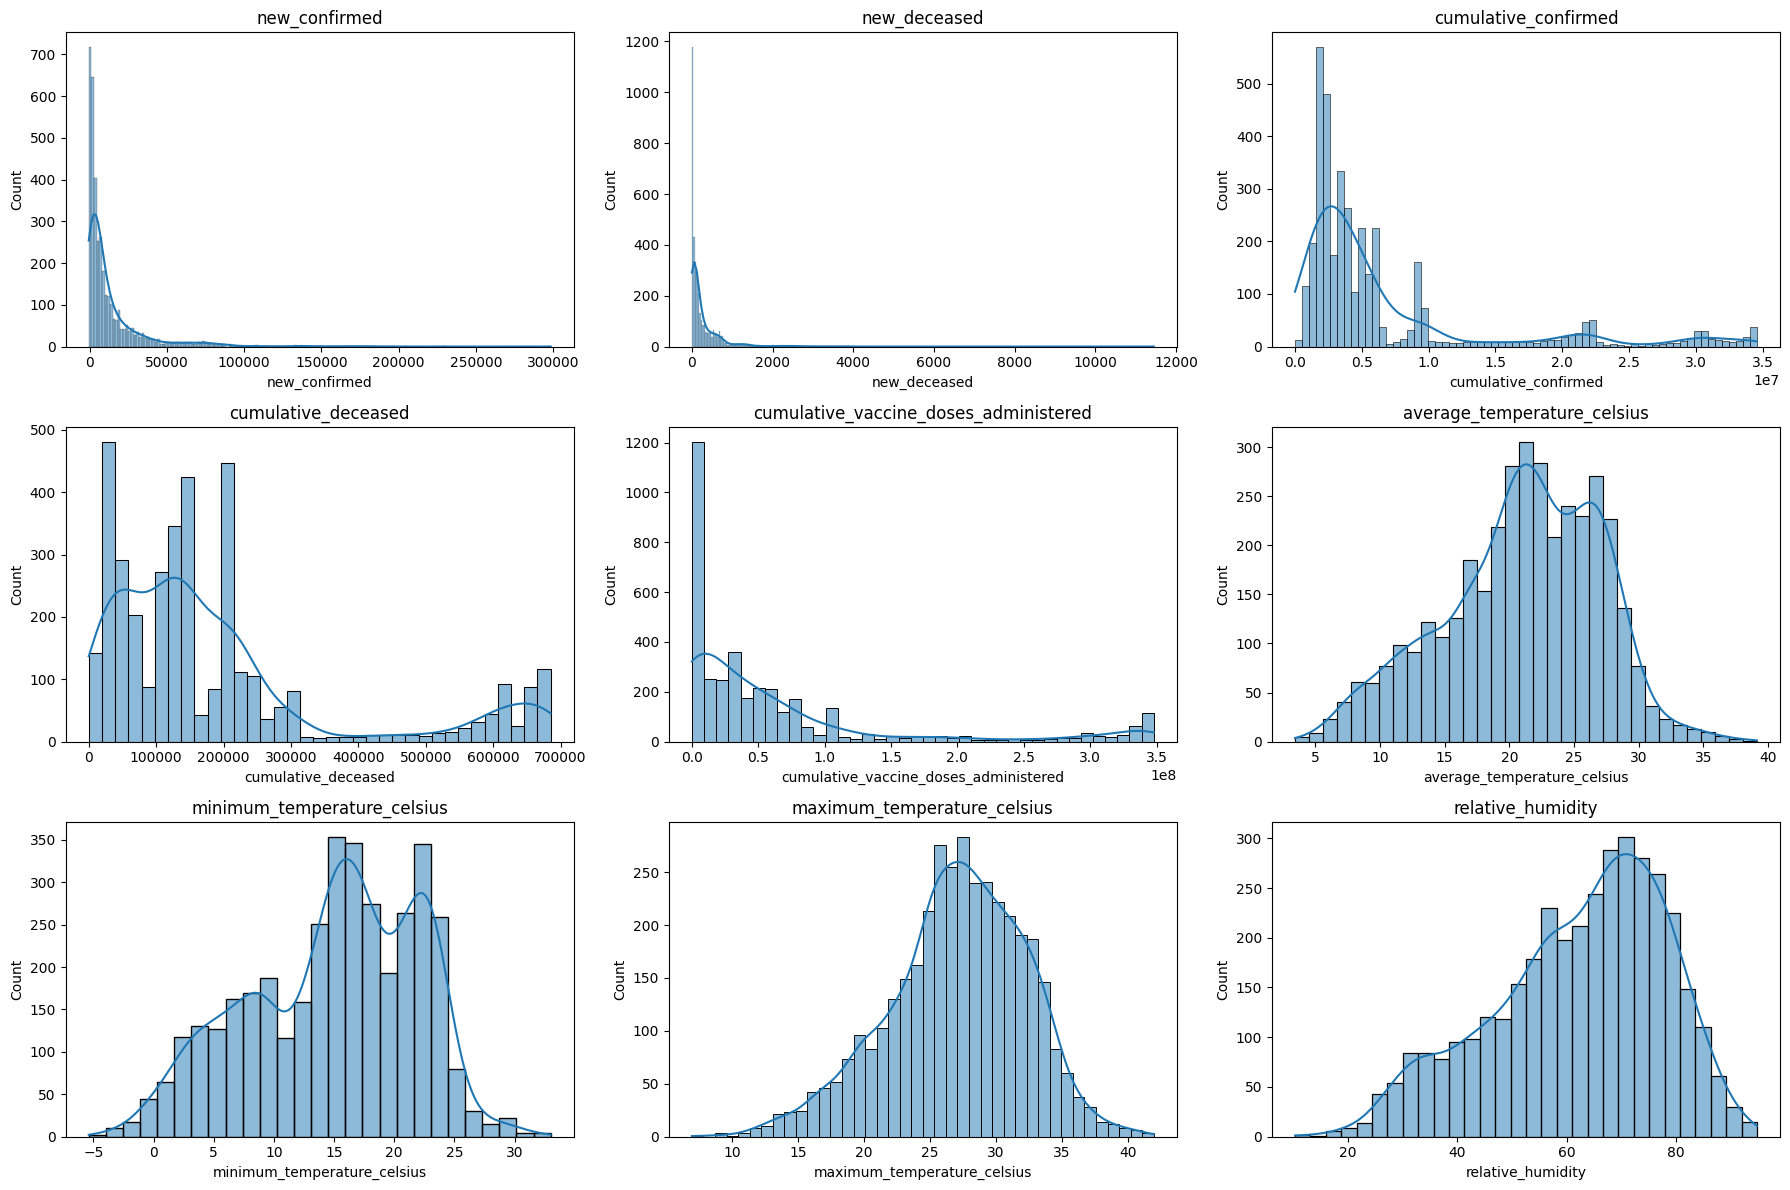

In [26]:
lista_columnas_6=["new_confirmed","new_deceased","cumulative_confirmed","cumulative_deceased",
                  "cumulative_vaccine_doses_administered","average_temperature_celsius","minimum_temperature_celsius",
                  "maximum_temperature_celsius","relative_humidity"]
columnas = 3  # columnas por fila
filas = math.ceil(len(lista_columnas_6) / columnas)

# Crear figura
fig, axes = plt.subplots(filas, columnas, figsize=(6 * columnas, 4 * filas))
#Aplanar para crear lista
axes = axes.flatten()


for i, col in enumerate(lista_columnas_6):
    sns.histplot(data_latinoamerica_paises[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Eliminar ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [34]:
data_latinoamerica_paises['new_confirmed_pct'] = (
    data_latinoamerica_paises['new_confirmed'] / data_latinoamerica_paises['population']
) * 100


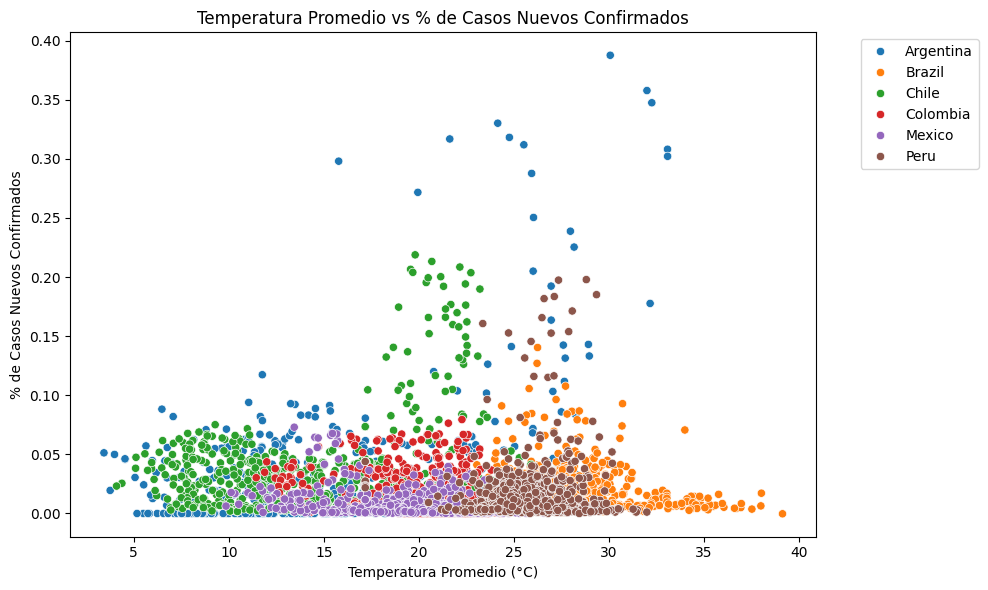

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(
    x='average_temperature_celsius',
    y='new_confirmed_pct',
    data=data_latinoamerica_paises,
    hue='country_name'
)
plt.title('Temperatura Promedio vs % de Casos Nuevos Confirmados')
plt.xlabel('Temperatura Promedio (°C)')
plt.ylabel('% de Casos Nuevos Confirmados')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


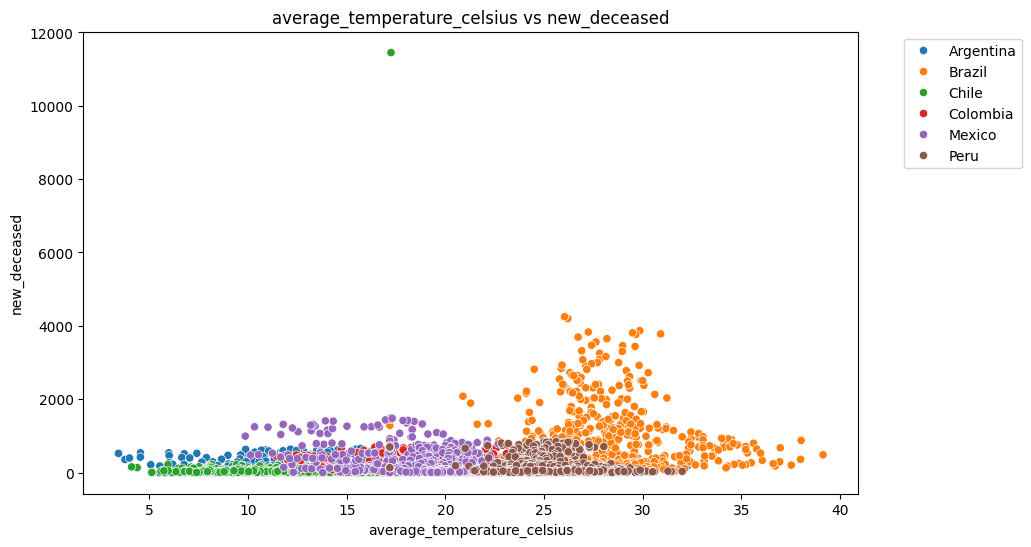

In [29]:
# Grafica de average_temperature_celsius vs new_deceased
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_deceased', data=data_latinoamerica_paises, hue='country_name')
plt.title('average_temperature_celsius vs new_deceased')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [30]:
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date', inplace=True)

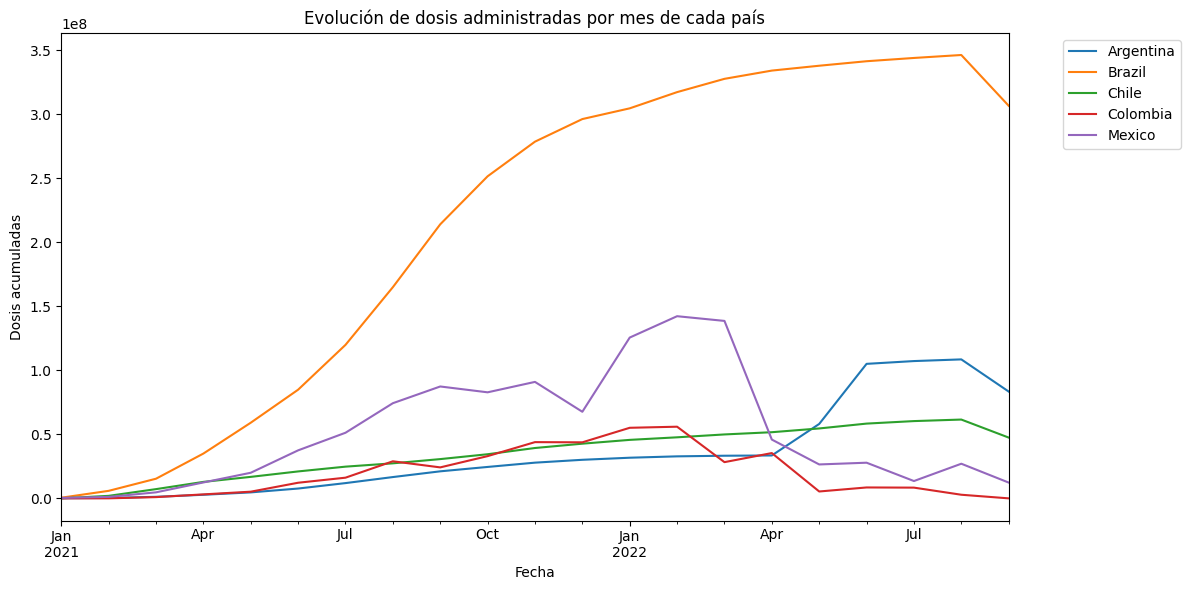

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

for pais in paises_seleccionados:
    datos_pais = data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == pais]
    
    # Asegurarse de que haya datos y que no sean todos NaN
    if not datos_pais.empty and not datos_pais['cumulative_vaccine_doses_administered'].dropna().empty:
        datos_resample = datos_pais['cumulative_vaccine_doses_administered'].resample('M').mean()
        datos_resample.plot(label=pais)

ax.set_title('Evolución de dosis administradas por mes de cada país')
ax.set_ylabel('Dosis acumuladas')
ax.set_xlabel('Fecha')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


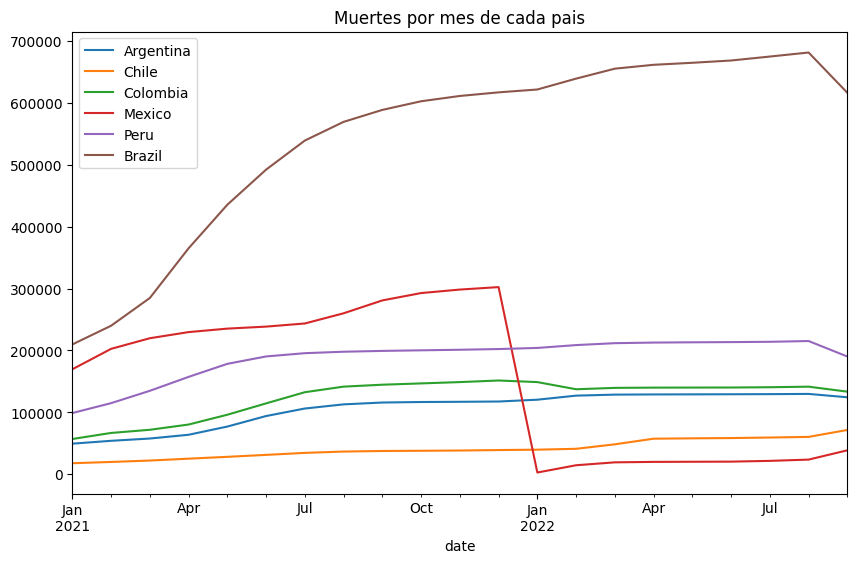

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_deceased'].plot()
plt.title('Muertes por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

In [ ]:
cut_columns = ['country_name','population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
last_cases = data_latinoamerica_paises[cut_columns].groupby('country_name').last().sort_values(by='population_age_00_09')
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = last_cases[age_columns].sum()
age_distribution

population_age_00_09           72354498.0
population_age_10_19           75821668.0
population_age_20_29           75953404.0
population_age_30_39           72153175.0
population_age_40_49           59596656.0
population_age_50_59           47961620.0
population_age_60_69           32654396.0
population_age_70_79           17789478.0
population_age_80_and_older     8711719.0
dtype: float64

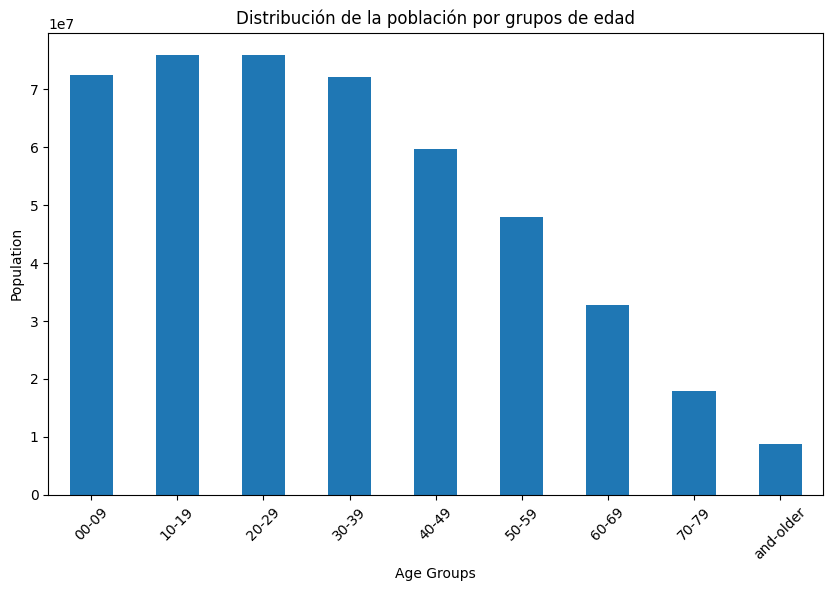

In [ ]:
# Calculamos la distribucion de la poblacion por grupos de edad

cut_columns = ['country_name','population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
last_cases = data_latinoamerica_paises[cut_columns].groupby('country_name').last().sort_values(by='population_age_00_09')
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = last_cases[age_columns].sum()

plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Distribución de la población por grupos de edad')
plt.xticks(range(len(age_columns)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_columns], rotation=45)

plt.show()

In [45]:
print(data_latinoamerica_paises)



           location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru   12911.385484   
2022-09-15           PE           PE         Peru   12911.385484   
2022-09-16           PE           PE         Peru   12911.385484   
2022-09-17           PE           PE         Peru   12911.385484   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                        

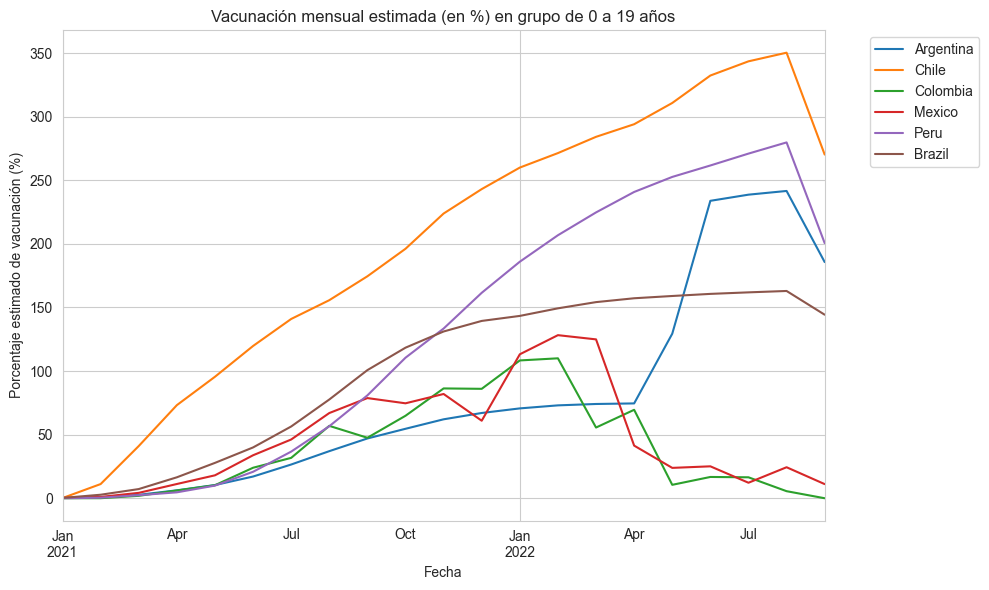

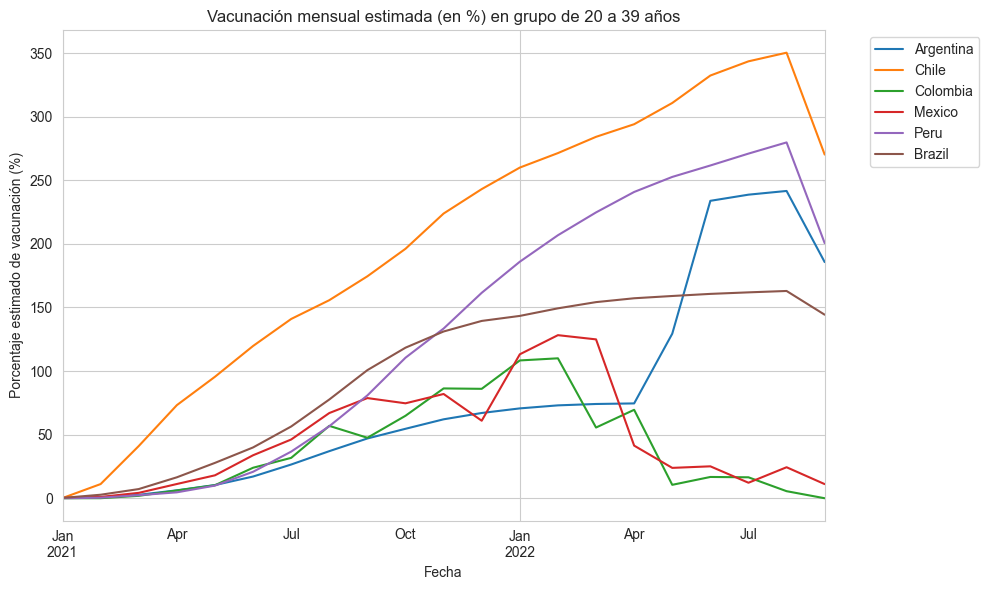

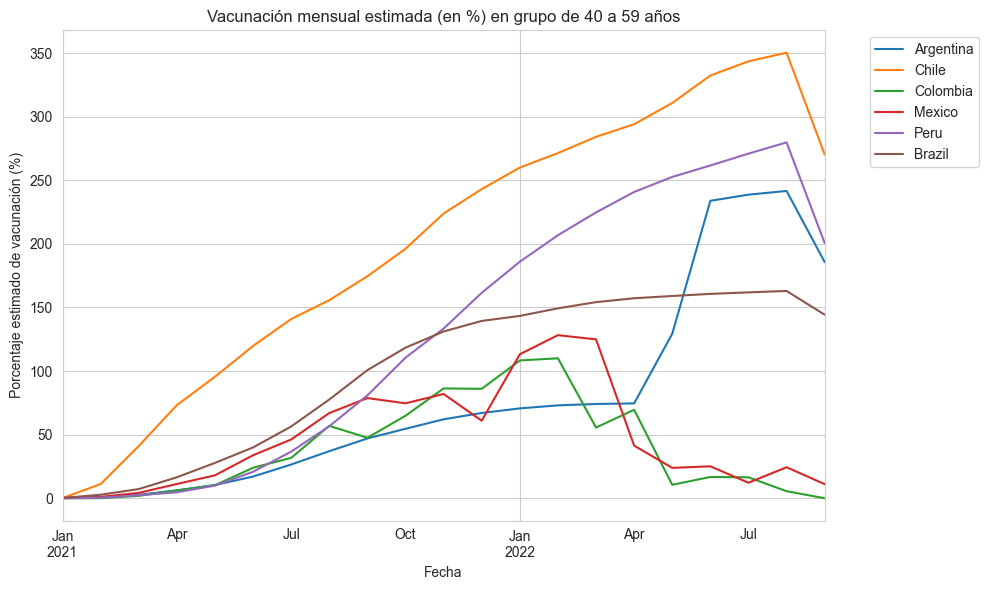

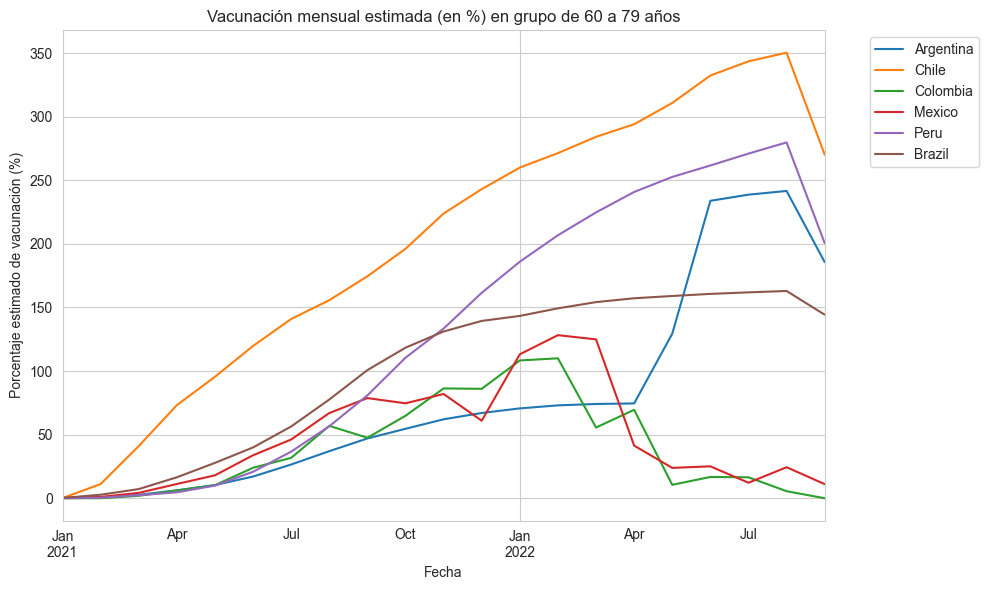

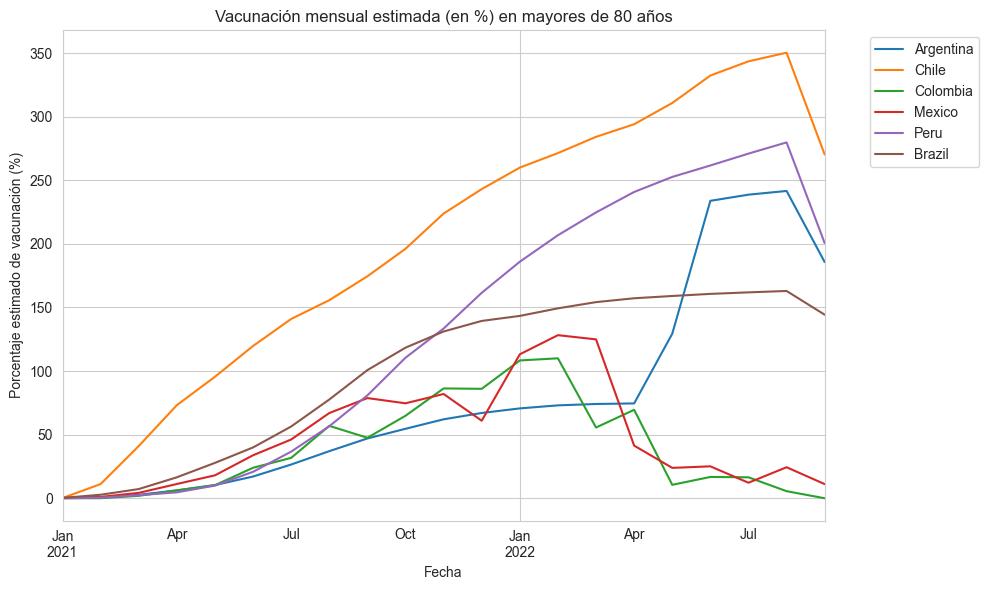

In [46]:
import matplotlib.pyplot as plt

# Agrupación de edades
data_latinoamerica_paises['population_age_00_19'] = data_latinoamerica_paises['population_age_00_09'] + data_latinoamerica_paises['population_age_10_19']
data_latinoamerica_paises['population_age_20_39'] = data_latinoamerica_paises['population_age_20_29'] + data_latinoamerica_paises['population_age_30_39']
data_latinoamerica_paises['population_age_40_59'] = data_latinoamerica_paises['population_age_40_49'] + data_latinoamerica_paises['population_age_50_59']
data_latinoamerica_paises['population_age_60_79'] = data_latinoamerica_paises['population_age_60_69'] + data_latinoamerica_paises['population_age_70_79']
# El grupo de 80+ ya está
data_latinoamerica_paises['population_age_80_and_older'] = data_latinoamerica_paises['population_age_80_and_older']

# Porcentaje estimado de vacunación por grupo etario
for grupo in ['00_19', '20_39', '40_59', '60_79', '80_and_older']:
    pop_key = f'population_age_{grupo}'
    vac_key = f'vacunacion_pct_{grupo}'
    data_latinoamerica_paises[vac_key] = (
        100 * data_latinoamerica_paises['cumulative_vaccine_doses_administered'] *
        data_latinoamerica_paises[pop_key] / data_latinoamerica_paises['population'] /
        data_latinoamerica_paises[pop_key]
    ).fillna(0)

# Asegurarse de que la fecha esté en el índice y en formato datetime
data_latinoamerica_paises.index = pd.to_datetime(data_latinoamerica_paises.index)


# Lista de países
paises_seleccionados = ['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil']

# Función para graficar
def graficar_vacunacion(grupo, titulo):
    fig, ax = plt.subplots(figsize=(10, 6))
    for pais in paises_seleccionados:
        df_filtrado = data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == pais]
        df_resample = df_filtrado.resample('ME').mean(numeric_only=True)
        df_resample[f'vacunacion_pct_{grupo}'].plot(label=pais)
    plt.title(titulo)
    plt.ylabel('Porcentaje estimado de vacunación (%)')
    plt.xlabel('Fecha')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Gráficos por grupo etario
graficar_vacunacion('00_19', 'Vacunación mensual estimada (en %) en grupo de 0 a 19 años')
graficar_vacunacion('20_39', 'Vacunación mensual estimada (en %) en grupo de 20 a 39 años')
graficar_vacunacion('40_59', 'Vacunación mensual estimada (en %) en grupo de 40 a 59 años')
graficar_vacunacion('60_79', 'Vacunación mensual estimada (en %) en grupo de 60 a 79 años')
graficar_vacunacion('80_and_older', 'Vacunación mensual estimada (en %) en mayores de 80 años')


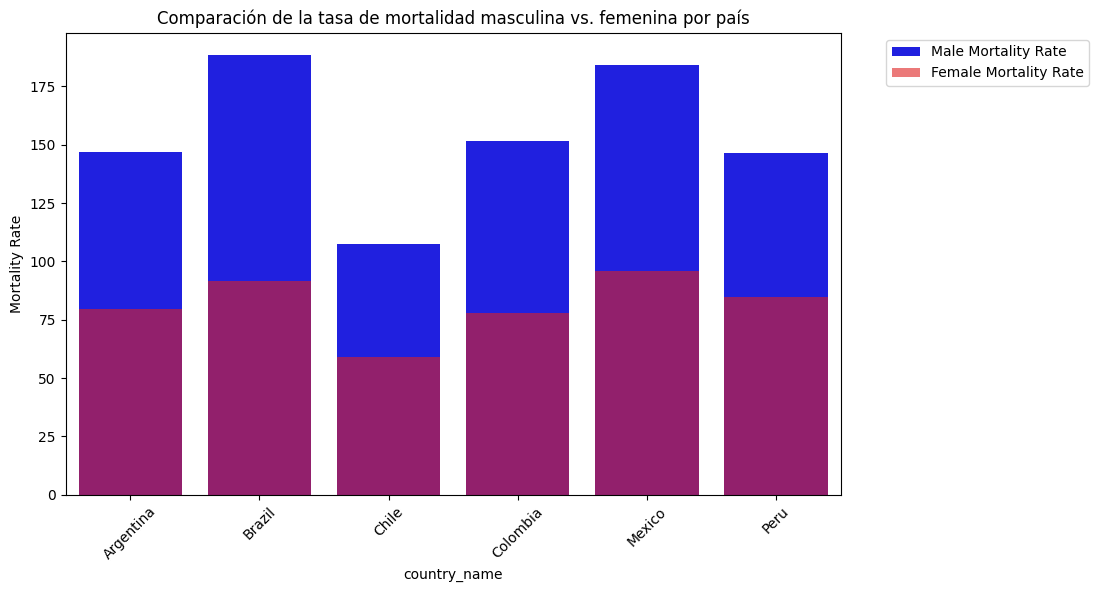

In [ ]:
# Grafica de mortalidad por genero. Tasa de Mortalidad entendida en Cantidad de muertes cada 1.000.000 de habitantes

plt.figure(figsize=(10, 6))
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_male_mortality_rate', color='blue', label='Male Mortality Rate')
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_female_mortality_rate', color='red', alpha=0.6, label='Female Mortality Rate')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate')
plt.title('Comparación de la tasa de mortalidad masculina vs. femenina por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

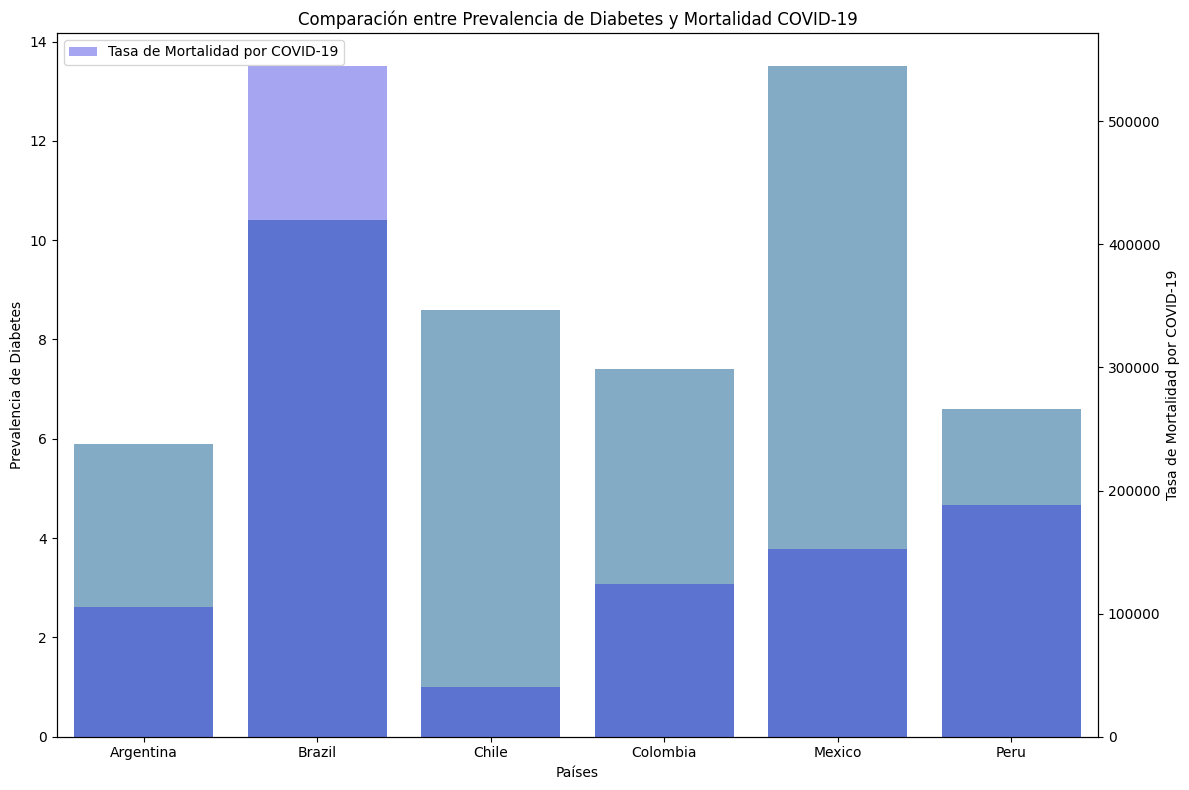

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtramos solo columnas numéricas junto con 'country_name'
numeric_cols = data_latinoamerica_paises.select_dtypes(include='number').columns
numeric_cols = ['country_name'] + list(numeric_cols)  # Incluimos 'country_name' en la selección

# Creamos un nuevo DataFrame con solo columnas válidas
filtered_data = data_latinoamerica_paises[numeric_cols]

# Agrupamos por 'country_name' y calculamos el promedio
aggregated_data = filtered_data.groupby('country_name', as_index=False).mean()

# Configuramos la figura y los ejes
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Gráfico 1: Prevalencia de Diabetes
sns.barplot(
    data=aggregated_data,
    x='country_name',
    y='diabetes_prevalence',
    alpha=0.6,
    ax=ax
)

# Creamos un segundo eje y para Tasa de Mortalidad
ax2 = ax.twinx()
sns.barplot(
    data=aggregated_data,
    x='country_name',
    y='cumulative_deceased',
    color='Blue',
    label='Tasa de Mortalidad por COVID-19',
    alpha=0.4,
    ax=ax2
)

# Ajustamos los textos y etiquetas
plt.xticks(rotation=90)  # Rota las etiquetas del eje x
ax.set_xlabel('Países')  # Etiqueta del eje x
ax.set_ylabel('Prevalencia de Diabetes')  # Etiqueta eje y izquierdo
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')  # Etiqueta eje y derecho
plt.title('Comparación entre Prevalencia de Diabetes y Mortalidad COVID-19')

# Añadimos leyenda
ax2.legend(loc='upper left')

# Mostramos el gráfico
plt.tight_layout()
plt.show()


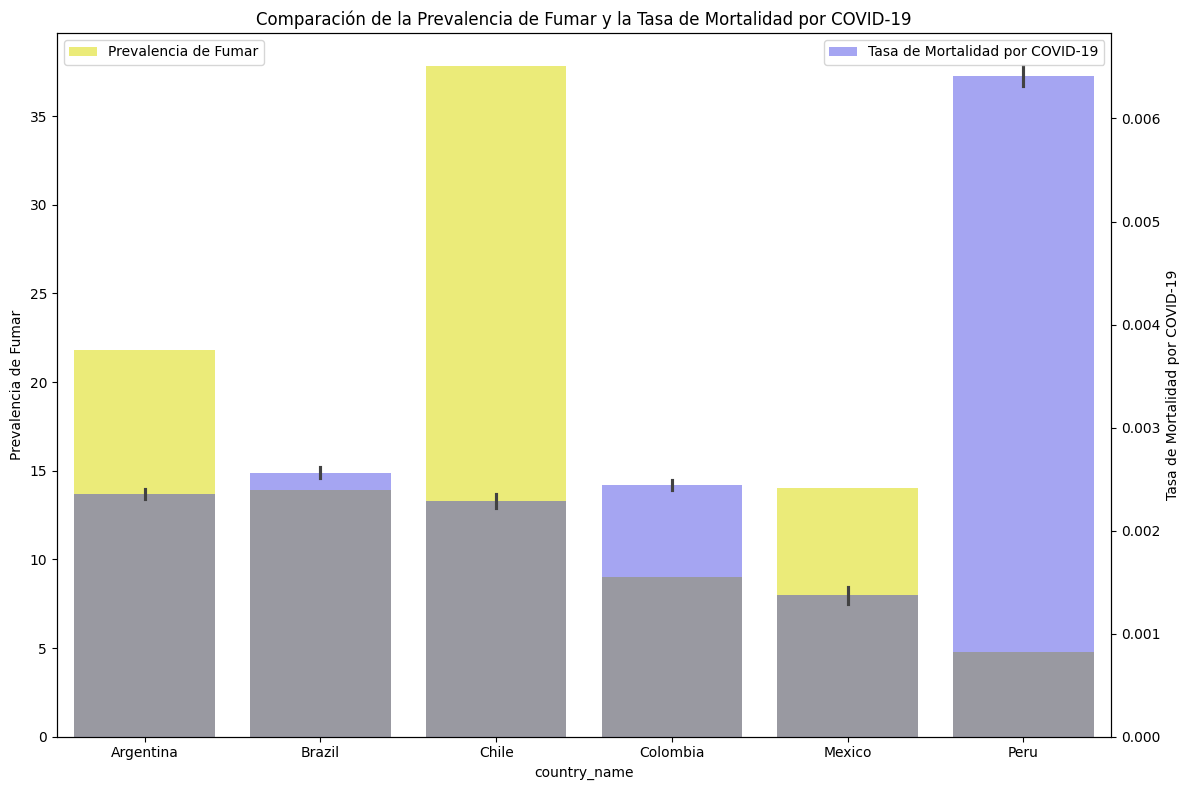

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Limpieza y validación del DataFrame ---
# Supongamos que ya tienes cargado tu DataFrame `data_latinoamerica_paises`.

# 1. Eliminar columnas duplicadas
data_latinoamerica_paises = data_latinoamerica_paises.loc[:, ~data_latinoamerica_paises.columns.duplicated()]

# 2. Convertir columnas clave a numéricas
columns_to_check = ['smoking_prevalence', 'cumulative_deceased', 'population']
for col in columns_to_check:
    data_latinoamerica_paises[col] = pd.to_numeric(data_latinoamerica_paises[col], errors='coerce')

# 3. Eliminar filas con valores NaN en columnas clave
data_latinoamerica_paises = data_latinoamerica_paises.dropna(subset=columns_to_check)

# 4. Verificar duplicados en el índice
if data_latinoamerica_paises.index.duplicated().any():
    data_latinoamerica_paises = data_latinoamerica_paises.reset_index(drop=True)

# 5. Verificar si hay valores inválidos en las columnas numéricas
for col in columns_to_check:
    if data_latinoamerica_paises[col].isnull().any():
        print(f"Advertencia: Hay valores nulos en la columna '{col}' después de limpiar.")

# --- Visualización del gráfico ---
# Configuración de la figura y ejes
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Gráfico 1: Prevalencia de Fumar
sns.barplot(
    data=data_latinoamerica_paises,
    x='country_name',  # Eje X: Nombres de los países
    y='smoking_prevalence',  # Eje Y: Prevalencia de fumar
    color='yellow',
    label='Prevalencia de Fumar',
    ax=ax,
    alpha=0.6
)

# Segundo eje Y para Tasa de Mortalidad por COVID-19
ax2 = ax.twinx()

# Crear la columna de tasa de mortalidad si aún no existe
data_latinoamerica_paises['mortality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population']

# Gráfico 2: Tasa de Mortalidad por COVID-19
sns.barplot(
    data=data_latinoamerica_paises,
    x='country_name',  # Eje X: Nombres de los países
    y='mortality_rate',  # Eje Y: Tasa de mortalidad
    color='blue',
    label='Tasa de Mortalidad por COVID-19',
    ax=ax2,
    alpha=0.4
)

# Personalización de las etiquetas
plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Fumar')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')

# Leyendas
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Título y diseño ajustado
plt.title('Comparación de la Prevalencia de Fumar y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [53]:
data_latinoamerica_paises = data_latinoamerica_paises.reset_index()


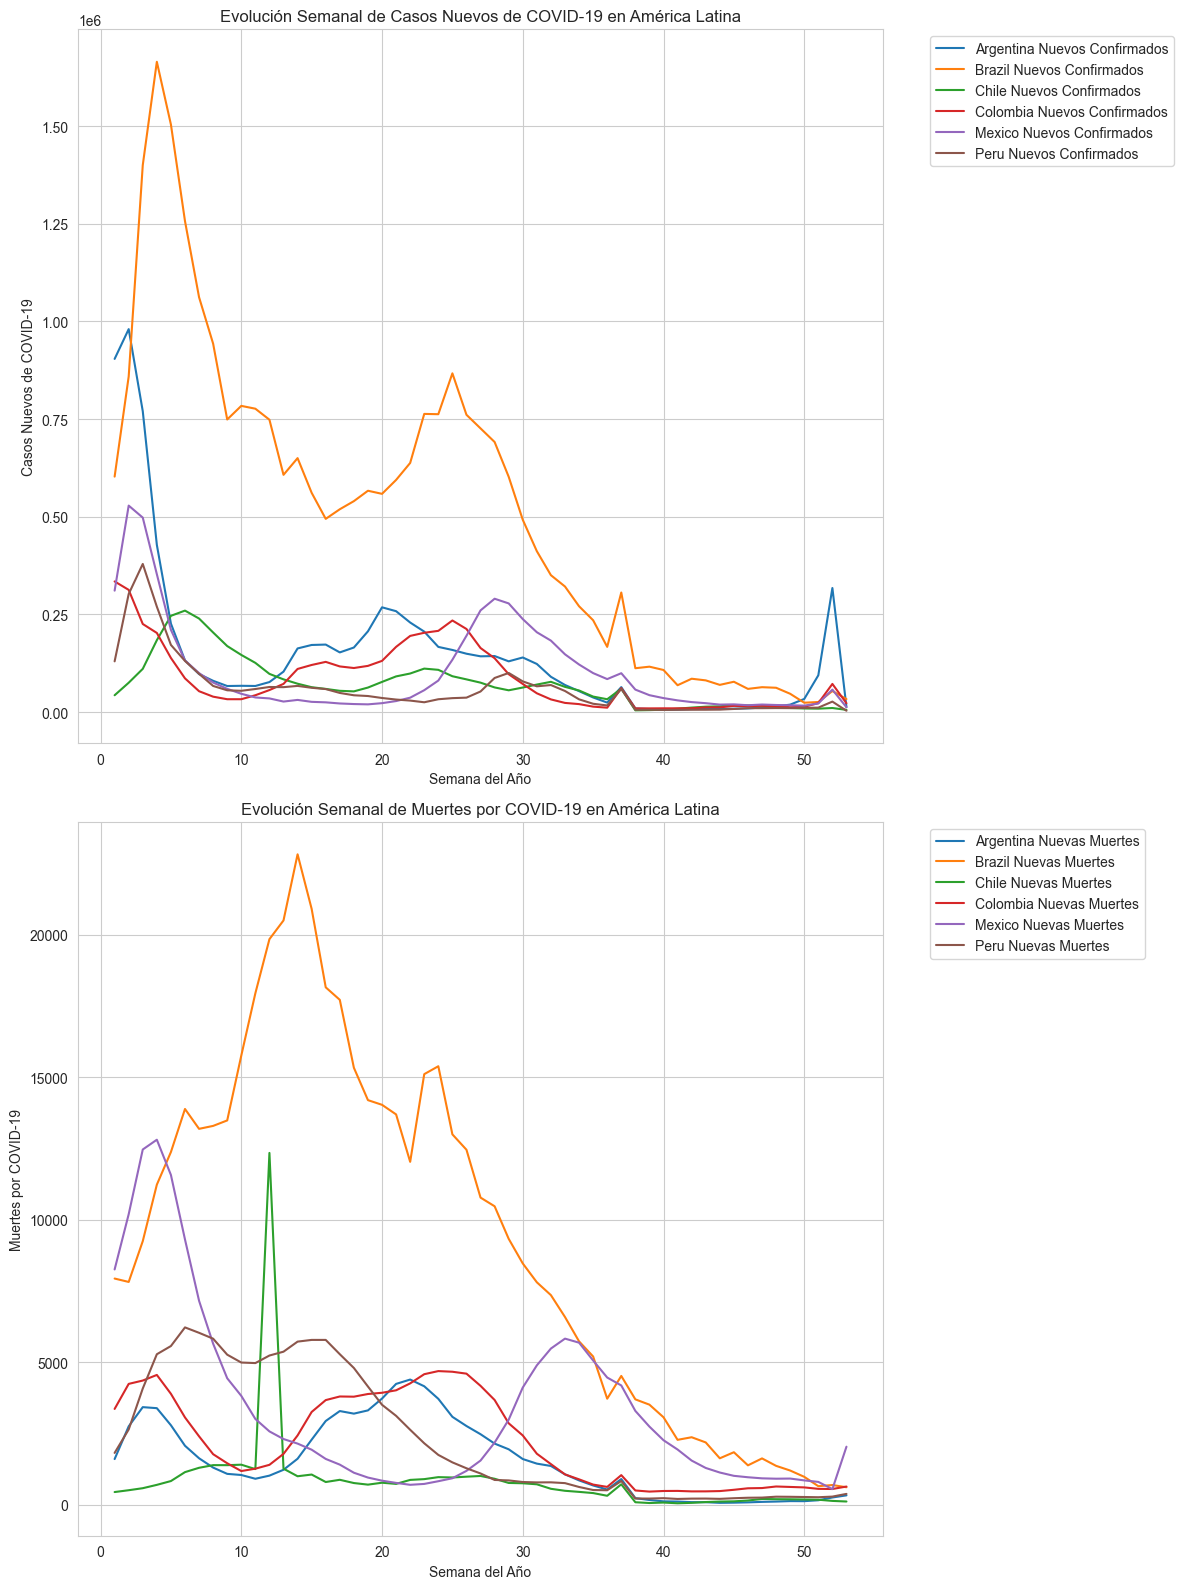

In [58]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegurarnos de que la columna date esté en formato datetime
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])

# Crear columna de semana del año si no existe
if 'week' not in data_latinoamerica_paises.columns:
    data_latinoamerica_paises['week'] = data_latinoamerica_paises['date'].dt.isocalendar().week

# ----------------------------
# Evolución Semanal de Casos Nuevos
# ----------------------------
weekly_cases = data_latinoamerica_paises.groupby(['country_name', 'week'])[['new_confirmed','new_deceased']].sum().reset_index()

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))
for country in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    ax[0].plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=f'{country} Nuevos Confirmados')
    ax[1].plot(country_weekly_cases['week'], country_weekly_cases['new_deceased'], label=f'{country} Nuevas Muertes')

ax[0].set_xlabel("Semana del Año")
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title("Evolución Semanal de Casos Nuevos de COVID-19 en América Latina")
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel("Semana del Año")
ax[1].set_ylabel("Muertes por COVID-19")
ax[1].set_title("Evolución Semanal de Muertes por COVID-19 en América Latina")
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
